<a href="https://colab.research.google.com/github/Nagi-131/ICP-5/blob/main/700761149%20ICP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
235/235 [==============================] - 12s 41ms/step - loss: 0.3664 - val_loss: 0.3117
Epoch 2/10
235/235 [==============================] - 4s 16ms/step - loss: 0.3025 - val_loss: 0.2994
Epoch 3/10
235/235 [==============================] - 4s 18ms/step - loss: 0.2940 - val_loss: 0.2930
Epoch 4/10
235/235 [==============================] - 4s 19ms/step - loss: 0.2887 - val_loss: 0.2892
Epoch 5/10
235/235 [==============================] - 4s 16ms/step - loss: 0.2857 - val_loss: 0.2865
Epoch 6/10
235/235 [==============================] - 4s 16ms/step - loss: 0.2836 - val_loss: 0.2846
Epoch 7/10
235/235 [==============================] - 5s 22ms/step - loss: 0.2815 - val_loss: 0.2830
Epoch 8/10
235/235 [==============================] - 4s 16ms/step - loss: 0.2800 - val_loss: 0.2816
Epoch 9/10
235/235 [==============================] - 4s 16ms/step - loss: 0.2789 - val_loss: 0.2804
Epoch 10/10
235/235 [==============================] - 5s 22ms/step - loss: 0.2776 - val_l

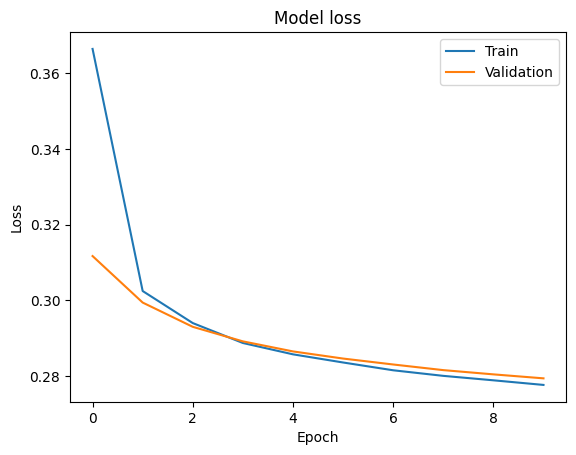

In [3]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np

# Define the size of our encoded representations
encoding_dim = 64  # Increased the encoding dimension for better performance

# This is our input placeholder
input_img = Input(shape=(784,))

# Adding a hidden layer
hidden_1 = Dense(128, activation='relu')(input_img)

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(hidden_1)

# Adding another hidden layer after encoding
hidden_2 = Dense(128, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hidden_2)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# Compile the model with a different optimizer and learning rate
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the data
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                epochs=10,  # Increased number of epochs for better training
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Plotting the loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


Epoch 1/10
235/235 [==============================] - 6s 23ms/step - loss: 0.3884 - val_loss: 0.3328
Epoch 2/10
235/235 [==============================] - 4s 16ms/step - loss: 0.3237 - val_loss: 0.3205
Epoch 3/10
235/235 [==============================] - 4s 16ms/step - loss: 0.3146 - val_loss: 0.3149
Epoch 4/10
235/235 [==============================] - 5s 23ms/step - loss: 0.3096 - val_loss: 0.3103
Epoch 5/10
235/235 [==============================] - 4s 16ms/step - loss: 0.3063 - val_loss: 0.3080
Epoch 6/10
235/235 [==============================] - 4s 16ms/step - loss: 0.3039 - val_loss: 0.3064
Epoch 7/10
235/235 [==============================] - 5s 21ms/step - loss: 0.3022 - val_loss: 0.3045
Epoch 8/10
235/235 [==============================] - 4s 16ms/step - loss: 0.3008 - val_loss: 0.3032
Epoch 9/10
235/235 [==============================] - 4s 16ms/step - loss: 0.2994 - val_loss: 0.3021
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


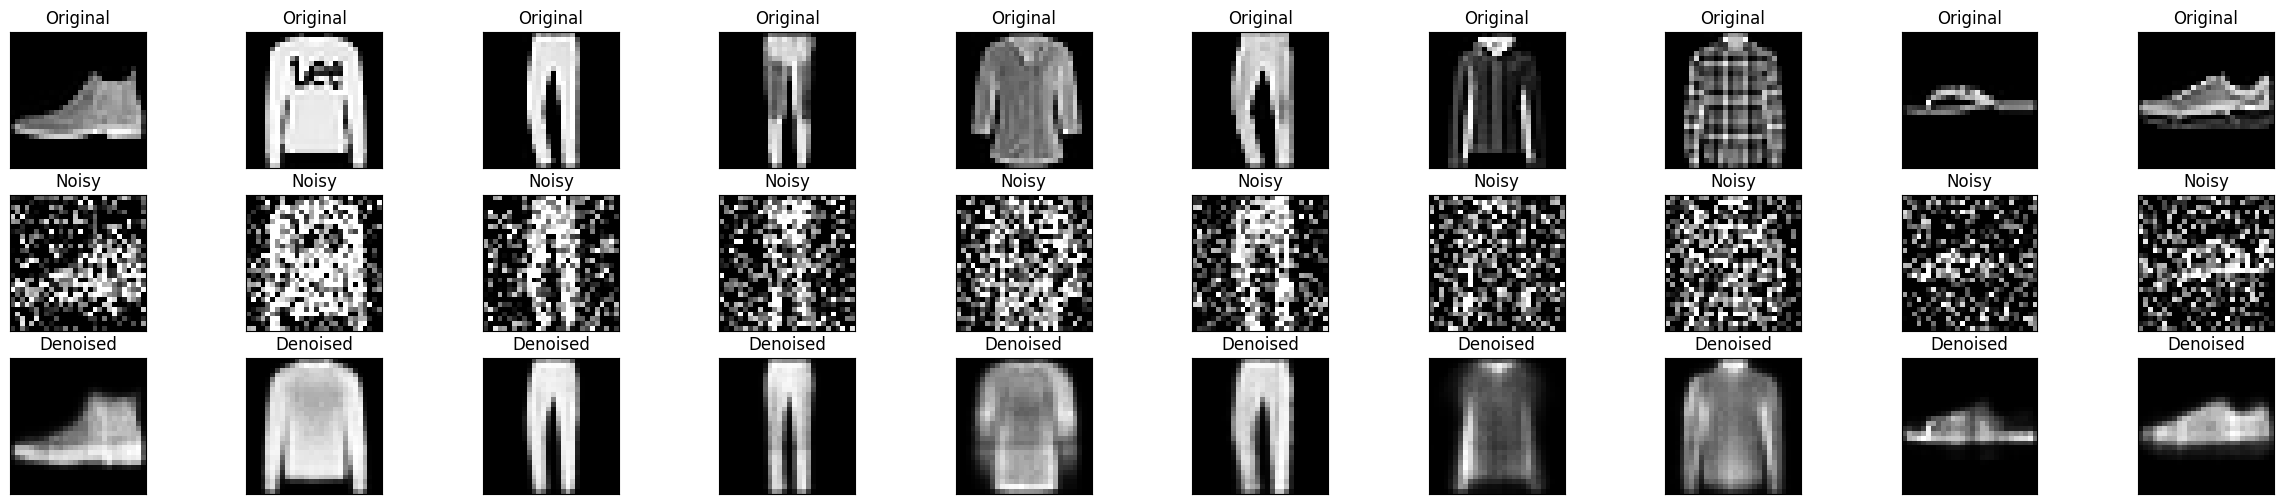

In [5]:
# Adding noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the denoising autoencoder architecture
input_img = Input(shape=(784,))
hidden_1 = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(hidden_1)
hidden_2 = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(hidden_2)
denoising_autoencoder = Model(input_img, decoded)

# Compile the denoising autoencoder
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the denoising autoencoder
history_denoising = denoising_autoencoder.fit(x_train_noisy, x_train,
                                              epochs=10,
                                              batch_size=256,
                                              shuffle=True,
                                              validation_data=(x_test_noisy, x_test))

# Predict on the noisy test data
decoded_imgs_denoising = denoising_autoencoder.predict(x_test_noisy)

# Visualize original, noisy, and denoised images
n = 10
plt.figure(figsize=(30, 6))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.title("Noisy")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs_denoising[i].reshape(28, 28))
    plt.title("Denoised")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


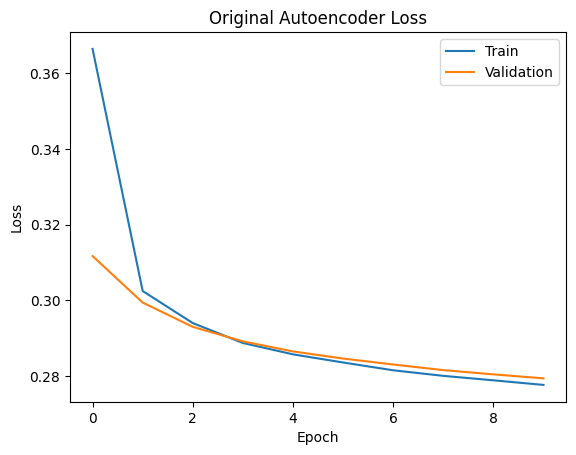

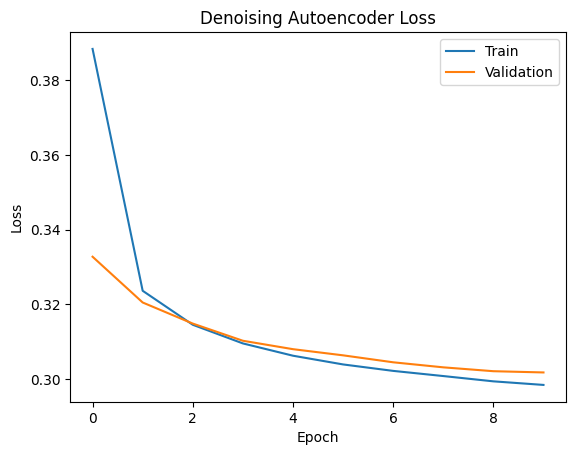

In [6]:
# Plotting loss for original autoencoder
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Original Autoencoder Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting loss for denoising autoencoder
plt.plot(history_denoising.history['loss'])
plt.plot(history_denoising.history['val_loss'])
plt.title('Denoising Autoencoder Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
